In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import svd

/home/alexsandro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


### <center> Análise de Componentes Principais - PCA </center>

---

#### Gerando dado sintético

In [6]:
x=np.random.normal(scale=2,size=200)
x2 =x+np.random.normal(scale=0.5,size=200)

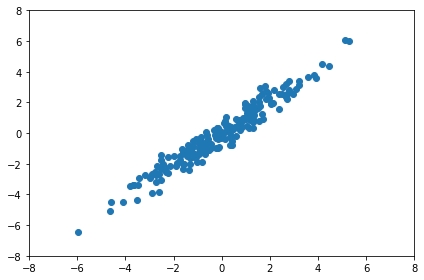

In [7]:
fig, axes = plt.subplots()

axes.set_xlim(-8,8)
axes.set_ylim(-8,8)

axes.scatter(x,x2)

fig.tight_layout()

In [4]:
df = pd.DataFrame({'x':x,'x2':x2})
df.head()

,x,x2
0,3.559166,2.892914
1,-1.719930,-1.673173
2,-0.108383,-0.073401
3,-0.432412,0.816801
4,-3.661918,-4.253356


A distribuição gerada tem o desvio padrão centrado em zero. Sendo assim, vamos obter a matriz de covariância

In [10]:
cov = df.cov()
cov

,x,x2
x,3.590314,3.546712
x2,3.546712,3.762473


### <center> Singular Decomposition Value </center>

Iremos decompor, a matriz de covariância dos dados utilizando a técnica de Decomposição em Valores Singulares:

$$\mathbf{S_X} = \mathbf{XX^t} = \mathbf{u_{Dxr}} \cdot \mathbf{\Sigma} \cdot \mathbf{v_{rxD}^t}$$

In [11]:
u, s, vh = svd(cov)

In [12]:
u

array([[-0.69847585, -0.71563363],
       [-0.71563363,  0.69847585]])

In [15]:
np.diag(s)

array([[7.22415012, 0.        ],
       [0.        , 0.12863684]])

In [16]:
vh

array([[-0.69847585, -0.71563363],
       [-0.71563363,  0.69847585]])

Em que $\mathbf{v}$ são as principais componentes. Para o obter os atributos, na base das principais componentes, realizaremos a seguinte operação

$$\mathbf{X_{pca}}=\mathbf{X}\cdot\mathbf{v}$$

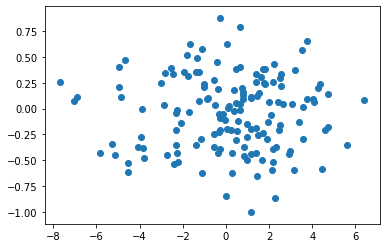

In [18]:
X_pca = np.matmul(df,vh)

plt.scatter(X_pca.x,X_pca.x2)

Na análise PCA, é feita a suposição que a variância e a média são estatísticas o suficiente para descrever o dado. A partir da matriz de valores singulares, podemos estimar a influência de cada componente na representação do dado.

In [19]:
s #Variância de cada componente

array([7.22415012, 0.12863684])

In [28]:
X_pca.var()

x     7.224150
x2    0.128637
dtype: float64

In [26]:
print(f'Contribuição da primeira componente: {(s/(np.sum(s)))[0]}')
print(f'Contribuição da segunda componente: {(s/(np.sum(s)))[1]}')

Contribuição da primeira componente: 0.9825050231270682
Contribuição da segunda componente: 0.017494976872931795
